In [2]:
import sys
sys.path.insert(0, 'E:\pycharm\PepBenchmark\src')
sys.path.append('E:\pycharm\PepBenchmark\src\pepbenchmark\external')

import warnings
warnings.filterwarnings("ignore")

In [2]:
import dis
from pepbenchmark.single_pred.singeltask_dataset import SingleTaskDatasetManager
from pepbenchmark.utils.logging import disable_logging,enable_logging
# disable_logging()
enable_logging()
dataset = SingleTaskDatasetManager(
    dataset_name="test",
    official_feature_names=["fasta","label"],
    force_download=True,
)

print(f"Dataset length: {len(dataset)}")
print("Official features:", dataset.official_feature_dict.keys())
dataset.set_user_feature("other_feature", list(range(len(dataset))))
print("User features:", dataset.user_feature_dict.keys())

# Set split indices
dataset.set_official_split_indices(split_type="random_split", fold_seed=1)
print("Split indices:", dataset.get_split_indices())

# Get train, valid, test features
train_features, valid_features, test_features = dataset.get_train_val_test_features(format="pytorch_dataset")
print("Train features:", train_features[0])

INFO:pepbenchmark.metadata:Dataset directory: C:\Users\wangr/.pepbenchmark_cache/data_share/peptide_dataset/processed_2025.6.12v/
[2025-06-30 15:42:42,286][INFO][pepbenchmark] Feature file ====test/fasta.csv=== exists but force_download is True, will re-download
[2025-06-30 15:42:42,287][INFO][pepbenchmark] Downloading ===test/fasta.csv=== from https://raw.githubusercontent.com/ZGCI-AI4S-Pep/peptide_data/main/test/fasta.csv
[2025-06-30 15:42:43,710][INFO][pepbenchmark] Set official feature: fasta successfully
[2025-06-30 15:42:43,712][INFO][pepbenchmark] Feature file ====test/label.csv=== exists but force_download is True, will re-download
[2025-06-30 15:42:43,713][INFO][pepbenchmark] Downloading ===test/label.csv=== from https://raw.githubusercontent.com/ZGCI-AI4S-Pep/peptide_data/main/test/label.csv
[2025-06-30 15:42:44,453][INFO][pepbenchmark] Set official feature: label successfully
[2025-06-30 15:42:44,454][INFO][pepbenchmark] Set user feature: other_feature successfully
[2025-06-

Dataset length: 10
Official features: dict_keys(['fasta', 'label'])
User features: dict_keys(['other_feature'])


[2025-06-30 15:42:45,564][INFO][pepbenchmark] Set official split ===random_split=== with seed ====1=== successfully


Split indices: {'train': [0, 1, 2, 3, 4, 5, 6, 7], 'valid': [8], 'test': [9]}
Train features: {'official_fasta': 'MTLKVLAGNTGTGPVRLL', 'official_label': np.int64(0), 'user_other_feature': 0}


### Featurization

In [5]:
from pepbenchmark.pep_utils.featurizer import PeptideFeaturizer
fp_featurizer1 = PeptideFeaturizer("fasta", "embedding")
fp_featurizer2 = PeptideFeaturizer("fasta", "biln")
result = fp_featurizer2("ALAGGGPCR")
print(result)


[2025-06-30 15:45:48,353][INFO][pepbenchmark] Failed to instantiate Fasta2Embedding. Reason: Fasta2Embedding.__init__() missing 1 required positional argument: 'model'
[2025-06-30 15:45:48,354][INFO][pepbenchmark] Expected parameters (from docstring):
[2025-06-30 15:45:48,355][INFO][pepbenchmark] 
    Convert FASTA sequence to molecular embedding using a pretrained model.
    If `model` is a string, initialize with Transformers; if it is a PyTorch model instance,
    it can be any `torch.nn.Module`. In that case, the model should provide a `tokenizer` attribute
    or have `config.name_or_path` for inference.

    Args:
        model: HuggingFace model identifier (str) or a PyTorch `nn.Module` instance.
        device: Optional device string (e.g., 'cuda', 'cpu'). Defaults to GPU if available else CPU.
    
[2025-06-30 15:45:48,355][INFO][pepbenchmark] Successfully instantiated Fasta2Biln with parameters: {}


A-L-A-G-G-G-P-C-R


### User defined features and split indices

In [8]:
import pandas as pd
from pepbenchmark.single_pred.singeltask_dataset import SingleTaskDatasetManager
from pepbenchmark.utils.logging import disable_logging,enable_logging
from pepbenchmark.pep_utils.featurizer import PeptideFeaturizer
from pepbenchmark.splitter.random_spliter import RandomSplitter
import warnings
warnings.filterwarnings("ignore")

enable_logging()
dataset = SingleTaskDatasetManager(
    dataset_name="QS_APML",
    official_feature_names=["fasta","label"],
    dataset_dir = "E:\pycharm\peptide_data\QS_APML")
fasta = dataset.get_official_feature("fasta")
helm_converter = PeptideFeaturizer("fasta", "helm")
smi_converter = PeptideFeaturizer("fasta", "smiles")
smiles = smi_converter(fasta)
fp_featurizer = PeptideFeaturizer("smiles", "fingerprint", {"fp_type": "Morgan", "radius": 2})
helm = helm_converter(fasta)
fp = fp_featurizer(smiles)

dataset.set_user_feature("helm", helm)
dataset.set_user_feature("fingerprint", fp)

spliter = RandomSplitter()
split_indices = spliter.get_split_indices(fasta,
                                        n_splits=5,
                                        frac_train=0.8,
                                        frac_valid=0.1,
                                        frac_test=0.1,
                                        seed=42,
                                    )

dataset.set_user_split_indices(split_indices)

# Get train, valid, test features
train_features, valid_features, test_features = dataset.get_train_val_test_features(format="dict")
train_df = pd.DataFrame(train_features)
train_df.head()

[2025-06-30 15:49:34,557][INFO][pepbenchmark] Set official feature: fasta successfully
[2025-06-30 15:49:34,571][INFO][pepbenchmark] Set official feature: label successfully
[2025-06-30 15:49:34,572][INFO][pepbenchmark] Feature fasta already loaded, skipping download
[2025-06-30 15:49:34,573][INFO][pepbenchmark] Successfully instantiated Fasta2Helm with parameters: {}
[2025-06-30 15:49:34,574][INFO][pepbenchmark] Successfully instantiated Fasta2Smiles with parameters: {}
[2025-06-30 15:49:34,853][INFO][pepbenchmark] Successfully instantiated Smiles2FP with parameters: {'fp_type': 'Morgan', 'radius': 2}
[15:49:34] DEPRECATION WARNING: please use MorganGenerator
[15:49:34] DEPRECATION WARNING: please use MorganGenerator
[15:49:34] DEPRECATION WARNING: please use MorganGenerator
[15:49:34] DEPRECATION WARNING: please use MorganGenerator
[15:49:34] DEPRECATION WARNING: please use MorganGenerator
[15:49:34] DEPRECATION WARNING: please use MorganGenerator
[15:49:34] DEPRECATION WARNING: plea

,official_fasta,official_label,user_helm,user_fingerprint
395,EMRLSKFFRDFILQRKK,1,PEPTIDE1{E.M.R.L.S.K.F.F.R.D.F.I.L.Q.R.K.K}$$$...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
78,DILIIVGG,1,PEPTIDE1{D.I.L.I.I.V.G.G}$$$V2.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
278,VEYHFLSPYVSPRE,0,PEPTIDE1{V.E.Y.H.F.L.S.P.Y.V.S.P.R.E}$$$V2.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
305,APTLWARMI,0,PEPTIDE1{A.P.T.L.W.A.R.M.I}$$$V2.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
325,EIRQTHNIFFNFFKRR,1,PEPTIDE1{E.I.R.Q.T.H.N.I.F.F.N.F.F.K.R.R}$$$V2.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Negative sample, Redundancy filter, Homo-based split

In [7]:
import pandas as pd
from pepbenchmark.single_pred.singeltask_dataset import SingleTaskDatasetManager
from pepbenchmark.splitter.homo_spliter import MMseqs2Spliter
from pepbenchmark.pep_utils.redundancy import RedundancyFilter
from pepbenchmark.utils.logging import disable_logging,enable_logging

enable_logging()

dataset = SingleTaskDatasetManager(
    dataset_name="QS_APML",
    official_feature_names=["fasta","label","smiles"],
    dataset_dir = "E:\pycharm\peptide_data\QS_APML",
    force_download = False)

#redundancy filter
fitter = RedundancyFilter(identity=0.3)
fasta = dataset.get_official_feature("fasta")
label = dataset.get_official_feature("label")
remain_index = fitter(fasta, label)
dataset.set_remain_feature(remain_index)
print(dataset.__len__())
print(remain_index)

#negative_sampling
dataset.negative_sampling(ratio = 1, seed=42)

# homo-based split
remain_fasta = dataset.get_official_feature("fasta")
spliter = MMseqs2Spliter()
split_indices = spliter.get_split_indices(remain_fasta,
                                        n_splits=5,
                                        frac_train=0.8,
                                        frac_valid=0.1,
                                        frac_test=0.1,
                                        identity=0.25,
                                        seed=42,
                                    )
print(split_indices)
dataset.set_user_split_indices(split_indices)

train_features, valid_features, test_features = dataset.get_train_val_test_features(format="dict")
train_df = pd.DataFrame(train_features)
train_df.head()


[2025-06-30 19:25:19,229][INFO][pepbenchmark] Set official feature: fasta successfully
[2025-06-30 19:25:19,232][INFO][pepbenchmark] Set official feature: label successfully
[2025-06-30 19:25:19,234][INFO][pepbenchmark] Set official feature: smiles successfully
[2025-06-30 19:25:19,235][INFO][pepbenchmark] Feature fasta already loaded, skipping download
[2025-06-30 19:25:19,236][INFO][pepbenchmark] Feature label already loaded, skipping download
[2025-06-30 19:25:33,819][INFO][pepbenchmark] Redundancy filter: 0.88 of the original data remains
[2025-06-30 19:25:33,821][INFO][pepbenchmark] Set remain feature successfully
[2025-06-30 19:25:33,822][INFO][pepbenchmark] Feature fasta already loaded, skipping download
[2025-06-30 19:25:33,823][INFO][pepbenchmark] Feature label already loaded, skipping download


384
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 22

[2025-06-30 19:25:34,553][INFO][pepbenchmark] Get 168 negative samples from PeptidePedia
[2025-06-30 19:25:34,564][INFO][pepbenchmark] Negative sampling with ratio 1 successfully, 
[2025-06-30 19:25:34,565][INFO][pepbenchmark] Removed official feature: smiles
[2025-06-30 19:25:34,566][INFO][pepbenchmark] Official features ['smiles'] need to be recomputed after negative sampling.
[2025-06-30 19:25:34,567][INFO][pepbenchmark] Feature fasta already loaded, skipping download
[2025-06-30 19:25:41,962][INFO][pepbenchmark] Total clusters: 329
Cluster size distribution:
  size = 1: 322 clusters
  size 2–4: 7 clusters
  size 5–9: 0 clusters
  size 10–19: 0 clusters
  size 20+: 0 clusters

[2025-06-30 19:25:42,046][INFO][pepbenchmark] Finish clustering and splitting data.
                    
Target train data size: 268, Train: 268
                    
Target valid data size：33， Valid: 33
                    
Target test data size：33, Test: 35
[2025-06-30 19:25:42,048][INFO][pepbenchmark] Set us

{'train': [157, 267, 169, 1, 133, 6, 164, 278, 27, 272, 268, 123, 163, 289, 53, 105, 40, 60, 100, 332, 316, 224, 231, 26, 31, 294, 56, 244, 23, 242, 117, 57, 335, 82, 150, 154, 141, 2, 287, 194, 44, 89, 300, 326, 217, 320, 49, 314, 201, 74, 5, 62, 323, 329, 61, 291, 10, 250, 88, 235, 252, 204, 172, 52, 98, 246, 227, 205, 94, 318, 77, 199, 50, 259, 230, 303, 296, 39, 219, 104, 90, 71, 148, 223, 113, 238, 234, 241, 262, 297, 66, 135, 30, 29, 111, 101, 191, 254, 119, 212, 321, 17, 189, 16, 304, 68, 22, 128, 273, 102, 120, 266, 315, 308, 12, 43, 290, 143, 126, 218, 243, 158, 299, 69, 4, 35, 75, 79, 131, 245, 197, 229, 216, 3, 286, 64, 306, 322, 247, 174, 72, 142, 228, 55, 206, 87, 42, 179, 106, 145, 330, 277, 200, 96, 24, 302, 305, 7, 270, 167, 313, 309, 91, 121, 109, 207, 298, 271, 220, 103, 173, 213, 263, 85, 279, 136, 195, 159, 132, 184, 198, 45, 237, 328, 177, 288, 281, 258, 146, 196, 269, 180, 107, 253, 0, 127, 108, 265, 209, 264, 81, 334, 161, 165, 275, 13, 8, 192, 324, 282, 73, 63, 

,official_fasta,official_label
157,YSTCSYYF,1
267,RQGPFERP,0
169,YAGFG,0
1,AVNACSSLF,1
133,AILPYFAGCL,1


[2025-06-30 19:25:52,837][INFO][pepbenchmark] Feature fasta already loaded, skipping download
[2025-06-30 19:25:52,838][INFO][pepbenchmark] Feature label already loaded, skipping download


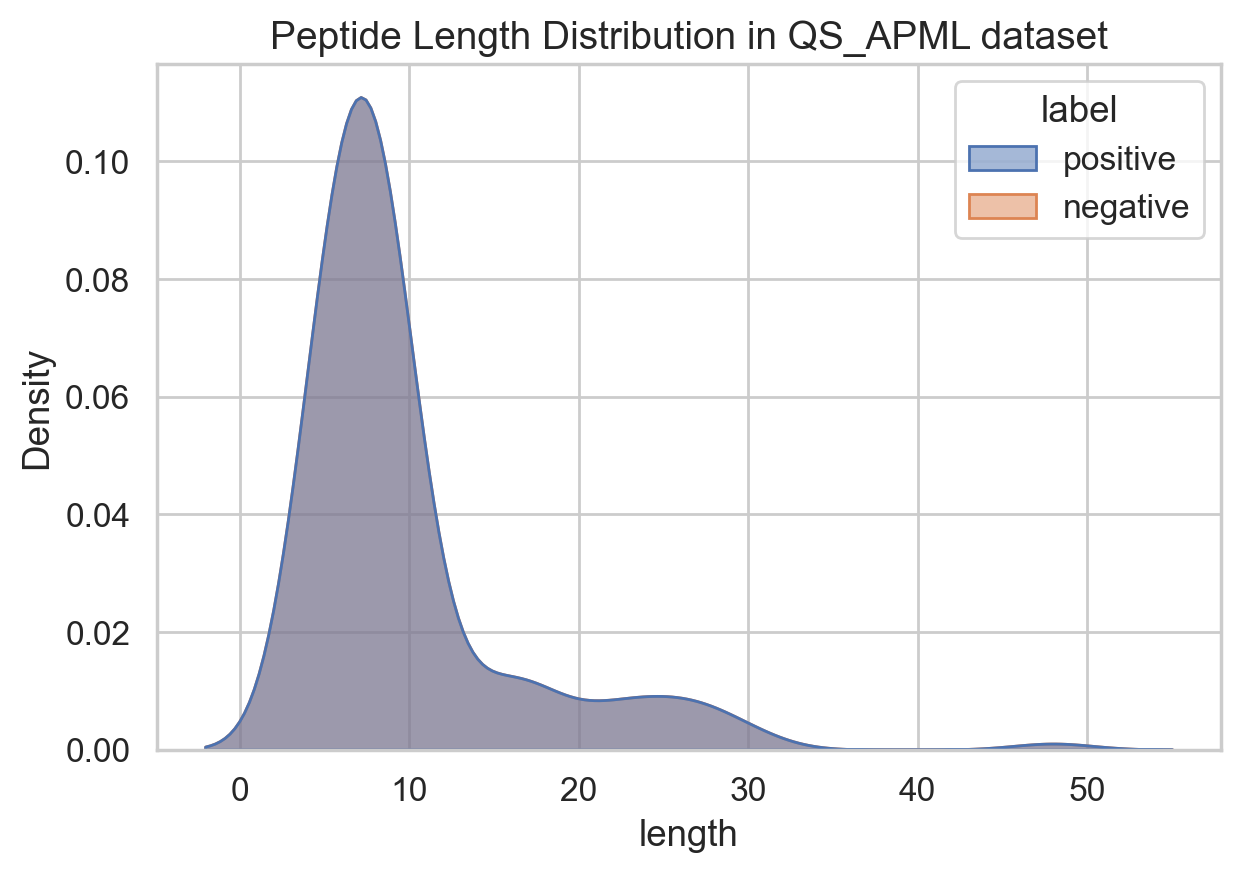

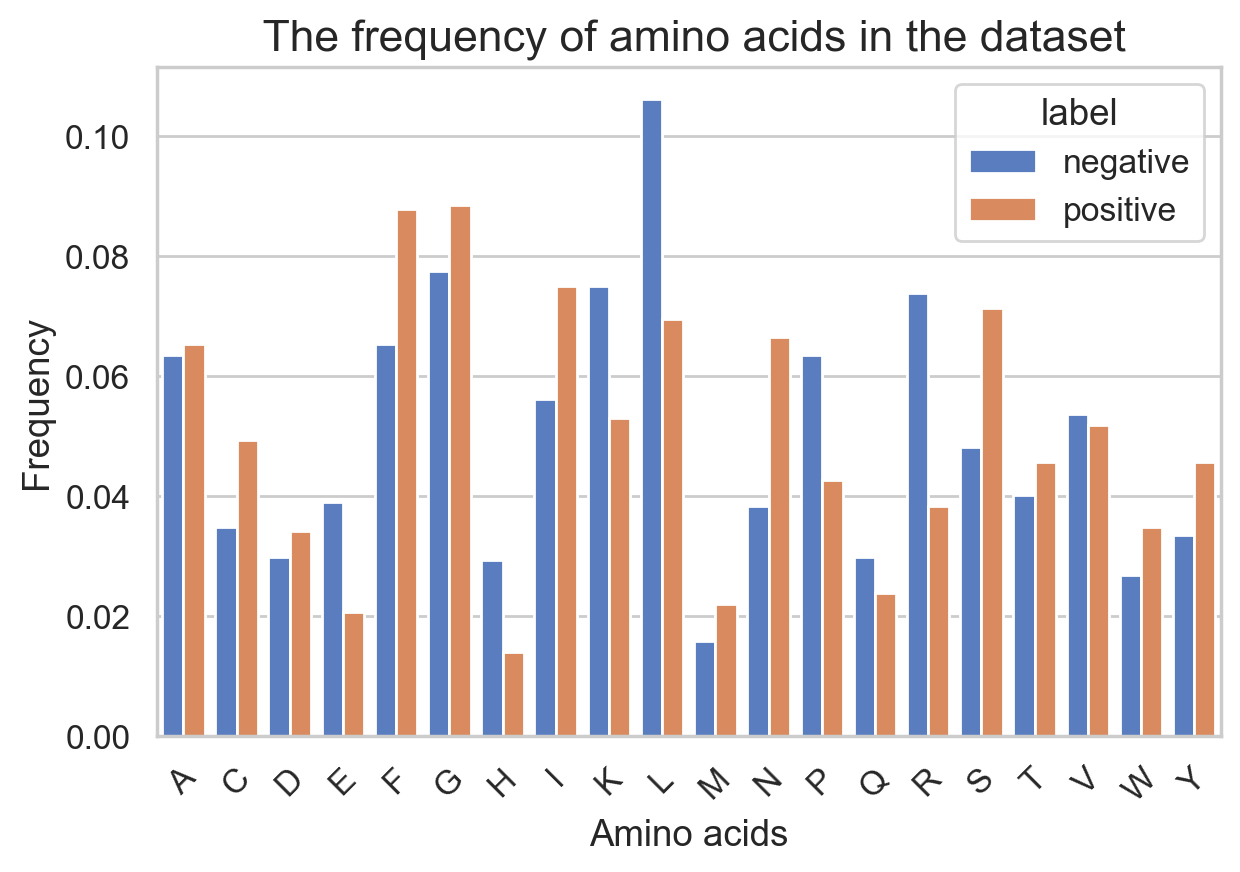

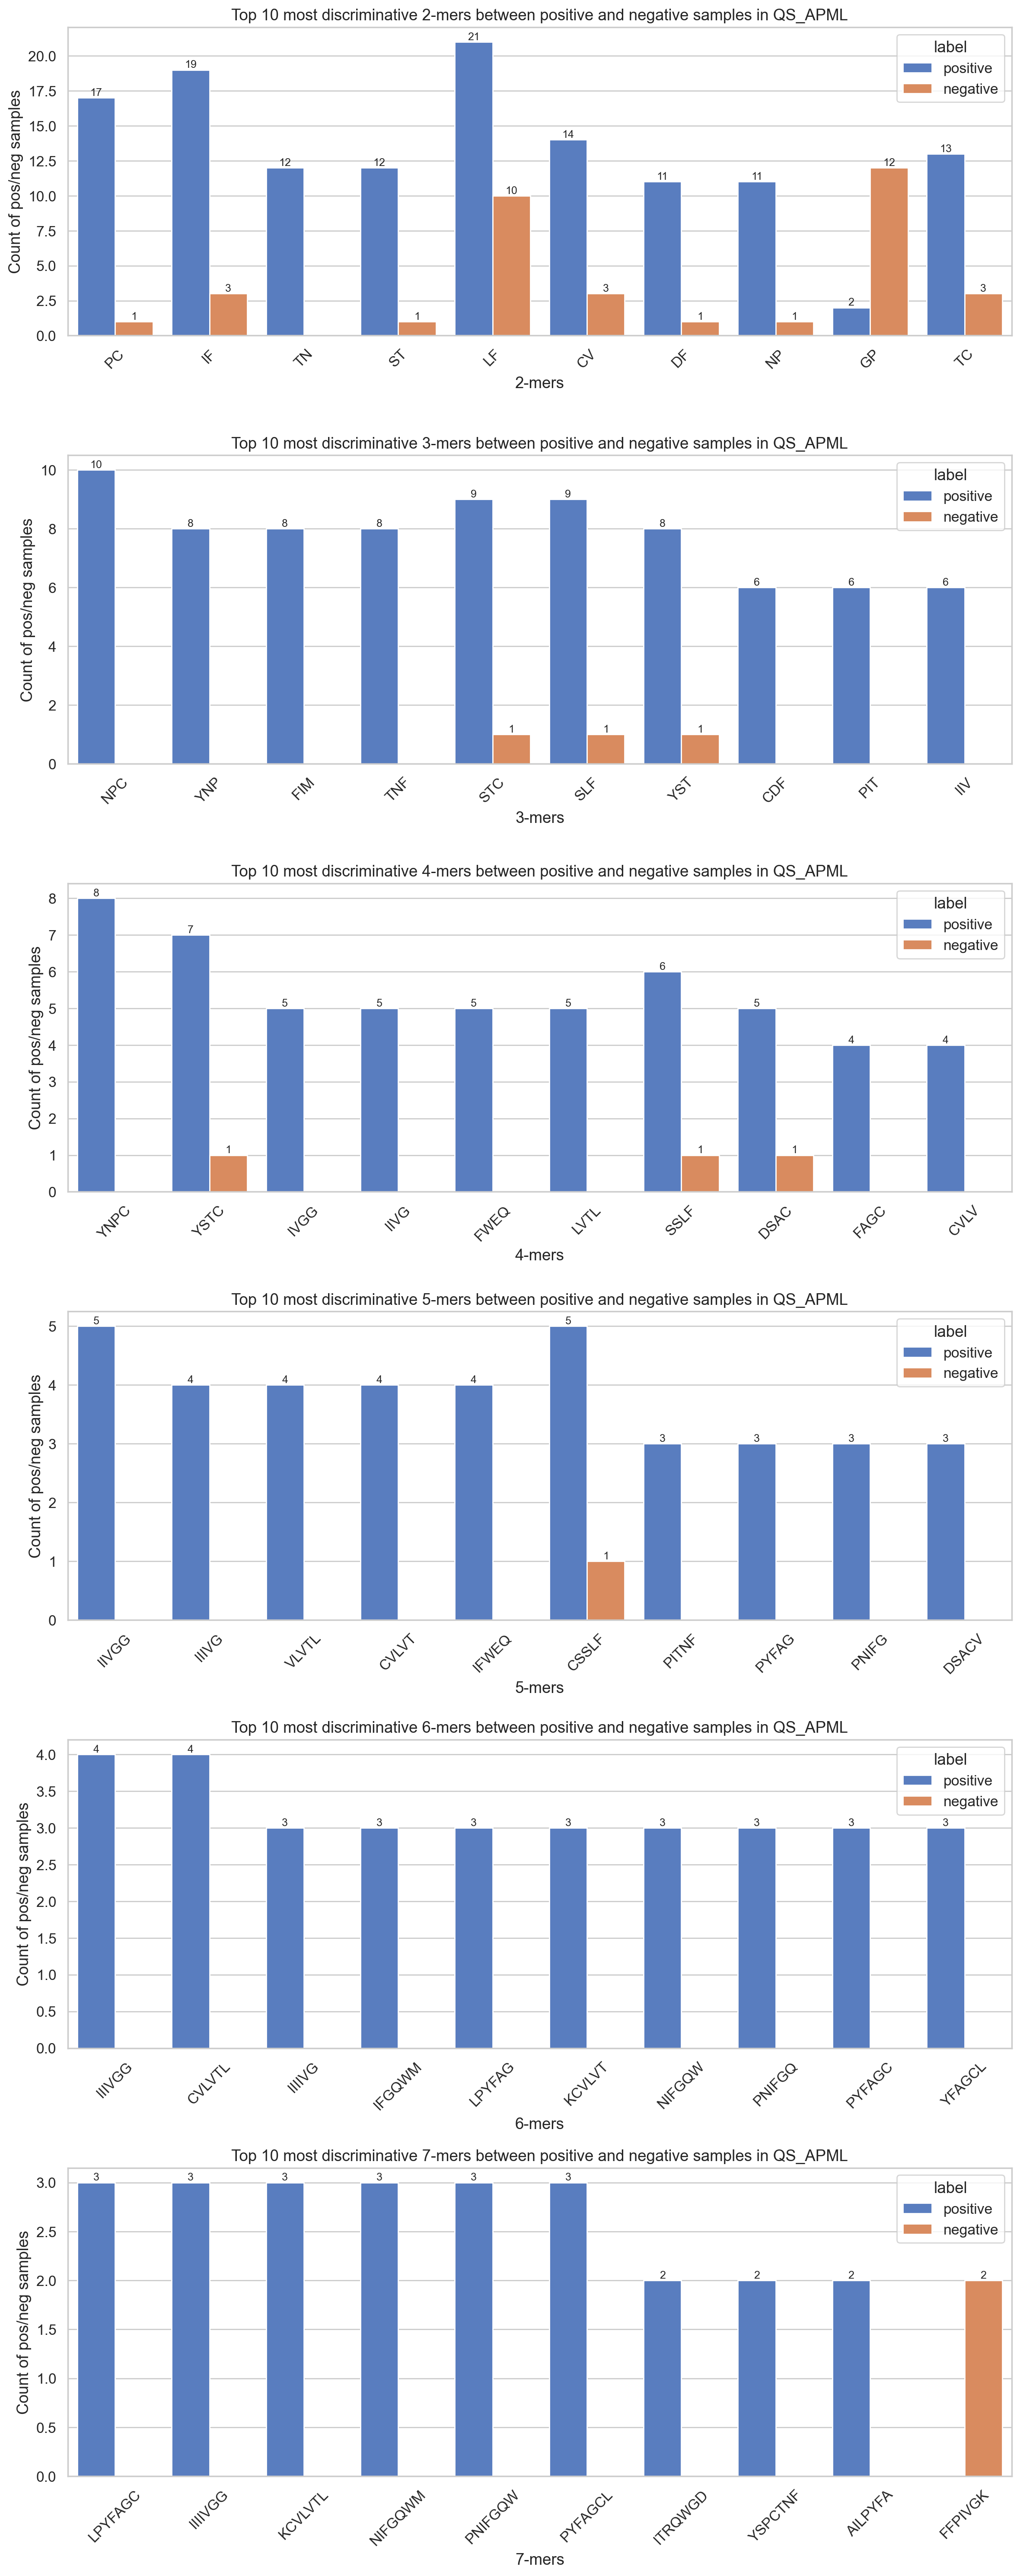

In [8]:
from pepbenchmark.visualization.distribution import plot_peptide_distribution
remain_fasta = dataset.get_official_feature("fasta")
remain_label = dataset.get_official_feature("label")
remain_df  = pd.DataFrame({"sequence":remain_fasta, "label":remain_label})
plot_peptide_distribution(remain_df, dataset_name = "QS_APML", type = "binary_classification")

### Multitaskdataset

In [11]:
from pepbenchmark.single_pred.multitask_dataset import MultiTaskDatasetManager
from pepbenchmark.pep_utils.featurizer import PeptideFeaturizer
from pepbenchmark.splitter.random_spliter import RandomSplitter

dataset = MultiTaskDatasetManager(
    labels=["Antibacterial", "Antiviral"],
    dataset_dir = "E:\pycharm\peptide_data\multitask_peptidepedia" ,
    force_download = False
)
dataset.negative_sampling(0.2, seed=42)
fasta = dataset.get_fasta()
helm_converter = PeptideFeaturizer("fasta", "helm")
dataset.set_user_feature("helm", helm_converter(fasta))

spliter = RandomSplitter()
split_indices = spliter.get_split_indices(fasta,
                                        n_splits=5,
                                        frac_train=0.8,
                                        frac_valid=0.1,
                                        frac_test=0.1,
                                        seed=42,
                                    )

dataset.set_user_split_indices(split_indices)

# Get train, valid, test features
train_features, valid_features, test_features = dataset.get_train_val_test_features(format="dict")
train_df = pd.DataFrame(train_features)
train_df.head()



[2025-06-30 19:32:09,741][INFO][pepbenchmark] MultitaskDataset for ['Antibacterial', 'Antiviral'] loaded.
[2025-06-30 19:32:10,571][INFO][pepbenchmark] Get 4642 negative samples from PeptidePedia
[2025-06-30 19:32:10,585][INFO][pepbenchmark] Successfully instantiated Fasta2Helm with parameters: {}
[2025-06-30 19:32:13,016][INFO][pepbenchmark] Set user feature: helm successfully
[2025-06-30 19:32:13,018][INFO][pepbenchmark] Set user-defined split indices successfully


,fasta,Antibacterial,Antiviral,helm
0,KLLKPLKKLLKLLK,1,0,PEPTIDE1{K.L.L.K.P.L.K.K.L.L.K.L.L.K}$$$V2.0
1,KKAAAAFAAFAAWFAAFAAAAKKKK,1,0,PEPTIDE1{K.K.A.A.A.A.F.A.A.F.A.A.W.F.A.A.F.A.A...
2,SPIGSHDSRLSLQQGTKLLERRTRMTPLWRFMGTKPTGAYCRDHFE...,1,0,PEPTIDE1{S.P.I.G.S.H.D.S.R.L.S.L.Q.Q.G.T.K.L.L...
3,GPWQEEDAAYGWMDF,0,0,PEPTIDE1{G.P.W.Q.E.E.D.A.A.Y.G.W.M.D.F}$$$V2.0
4,MMLLVLSISAILQVSHSV,0,0,PEPTIDE1{M.M.L.L.V.L.S.I.S.A.I.L.Q.V.S.H.S.V}$...
